<a href="https://colab.research.google.com/github/alorozco53/notes-fastai/blob/master/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import numpy as np

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [4]:
n = 100

In [5]:
np.ones((n, 2)).shape

(100, 2)

In [18]:
x = np.ones((n, 2))
x[:,0] = np.random.uniform(-1.0, 1.0, n)
x[:5]

array([[-0.064801,  1.      ],
       [ 0.070569,  1.      ],
       [-0.121125,  1.      ],
       [-0.854344,  1.      ],
       [ 0.916712,  1.      ]])

In [19]:
a = np.array([3.0, 2.0])
a

array([3., 2.])

In [20]:
a.shape, x.shape

((2,), (100, 2))

In [27]:
y = x.dot(a) + np.random.rand(n)

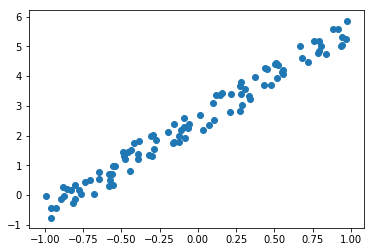

In [28]:
plt.scatter(x[:,0], y)

In [25]:
y = x[:, 0]**2 + x[:, 0]*3 + np.random.rand(n)

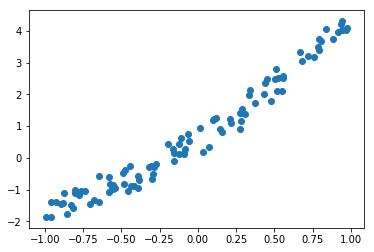

In [26]:
plt.scatter(x[:,0], y)

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [33]:
def mse(y_hat, y): 
    return ((y_hat - y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [38]:
a = np.array([-1.,1])

In [39]:
y_hat = x.dot(a)
mse(y_hat, y)

7.338474533404885

In [45]:
(y - y_hat)**2 / n

array([0.014145, 0.020417, 0.00747 , 0.027035, ..., 0.017451, 0.047457, 0.061371, 0.055907])

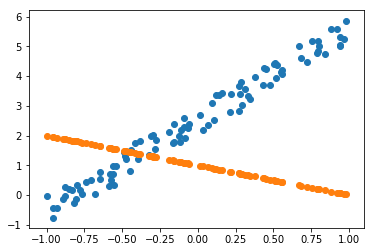

In [36]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [188]:
def derivatives2d():
    global y_hat, y
    error = y - y_hat
    derivatives = -(1.0 / n) * error.dot(x)
    return derivatives, mse(y, y_hat)

In [189]:
derivatives2d()

(array([-0.025703, -0.001656]), 0.08321736521287333)

In [190]:
a = np.ones(2)
a

array([1., 1.])

In [191]:
def update():
    global a, lr, t, y_hat
    y_hat = x.dot(a)
    grad, loss = derivatives2d()
    a = a - (lr * grad)
    if t % 10 == 0: 
        print(loss)
    grad = np.zeros(2)
    return loss

In [192]:
lr = 1e-1
for t in range(100): 
    loss = update()

3.5863527809890776
1.088534410157604
0.5026413665623979
0.28600957790855747
0.18495657308587016
0.13430119016386027
0.10844104305209519
0.09518122667289429
0.08837520218694168
0.08488094056656027


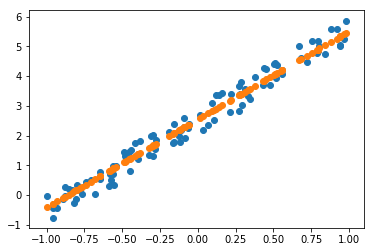

In [193]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x.dot(a));

## Animate it!

In [194]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [197]:
a = np.array([-1., 1])

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x.dot(a))
plt.close()

def animate(i):
    update()
    line.set_ydata(x.dot(a))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.